In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def Nulls_chking(df):
    null = df.isnull().sum()
    ratio = (null / df.shape[0])*100
    return pd.DataFrame({"Nulls" : null,"Ratio" : ratio}).T

# Part 1: Data Understanding 


In [3]:
# 1. Load the dataset using pandas. 
df = pd.read_csv('bank.csv')

# First 5 rows 
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343.0,yes,no,unknown,5,may,1042.0,1,-1,0,yes
1,56,admin.,married,secondary,45.0,no,no,unknown,5,may,1467.0,1,-1,0,yes
2,41,technician,married,secondary,1270.0,yes,no,unknown,5,may,1389.0,1,-1,0,yes
3,55,services,married,secondary,2476.0,yes,no,unknown,5,may,579.0,1,-1,0,yes
4,54,admin.,married,tertiary,184.0,no,no,unknown,5,may,673.0,2,-1,0,yes


In [4]:
# Dataset shape (rows, columns) 
df.shape

(11162, 15)

In [5]:
# Column names 
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'deposit']

In [6]:
#  Identify data types 
#  Check non-null counts 
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  str    
 2   marital    11162 non-null  str    
 3   education  11162 non-null  str    
 4   balance    11159 non-null  float64
 5   housing    11162 non-null  str    
 6   loan       11162 non-null  str    
 7   contact    11162 non-null  str    
 8   day        11162 non-null  int64  
 9   month      11162 non-null  str    
 10  duration   11158 non-null  float64
 11  campaign   11162 non-null  int64  
 12  pdays      11162 non-null  int64  
 13  previous   11162 non-null  int64  
 14  deposit    11162 non-null  str    
dtypes: float64(2), int64(5), str(8)
memory usage: 1.3 MB


# Part 2: Data Type Checking & Handling 

In [7]:
# Separate columns into: 
# Numerical columns (int, float) 
# Categorical columns (object) 

num_cols = df.select_dtypes('number').columns
categ_cols = df.select_dtypes('str').columns

print("Numerical Columns")
print(list(num_cols))

print("\nCategorical Columns")
print(list(categ_cols))

Numerical Columns
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Columns
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'deposit']


In [8]:
# Check if any column needs data type conversion
df.dtypes

age            int64
job              str
marital          str
education        str
balance      float64
housing          str
loan             str
contact          str
day            int64
month            str
duration     float64
campaign       int64
pdays          int64
previous       int64
deposit          str
dtype: object

# Part 3: Missing Values Analysis 

Data has no missing values but it contain many unkowns values so i replace them with nan then i will fill them with handeling strategy

In [9]:
# Replacing unknown with nan
df.replace("unknown", np.nan, inplace=True)
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343.0,yes,no,NaN,5,may,1042.0,1,-1,0,yes
1,56,admin.,married,secondary,45.0,no,no,NaN,5,may,1467.0,1,-1,0,yes
2,41,technician,married,secondary,1270.0,yes,no,NaN,5,may,1389.0,1,-1,0,yes
3,55,services,married,secondary,2476.0,yes,no,NaN,5,may,579.0,1,-1,0,yes
4,54,admin.,married,tertiary,184.0,no,no,NaN,5,may,673.0,2,-1,0,yes


In [10]:
# Check for missing values using: 
df.isnull().sum()

age             0
job            70
marital         0
education     497
balance         3
housing         0
loan            0
contact      2346
day             0
month           0
duration        4
campaign        0
pdays           0
previous        0
deposit         0
dtype: int64

In [11]:
# Calculate the percentage of missing values for each column.

null = df.isnull().sum()
ratio = (null / df.shape[0])*100
pd.DataFrame({"Nulls" : null,"Ratio" : ratio}).T

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Nulls,0.0,70.000000,0.0,497.000000,3.000000,0.0,0.0,2346.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0
Ratio,0.0,0.627128,0.0,4.452607,0.026877,0.0,0.0,21.017739,0.0,0.0,0.035836,0.0,0.0,0.0,0.0


# Part 4: Handling Missing Values (3 Methods) 


Method 1: Drop Columns

In [13]:
# Columns with more than 20% missing
cols_to_drop = ratio[ratio > 20].index

print("Columns to Drop >20% missing")
print(list(cols_to_drop))


Columns to Drop >20% missing
['contact']


i know we should drop coulmn if ratio > 40 but i need to apply the method

In [14]:
df_drop_cols = df.drop(columns=cols_to_drop)

print("Original Shape:", df.shape)
print("New Shape After Dropping Columns:", df_drop_cols.shape)


Original Shape: (11162, 15)
New Shape After Dropping Columns: (11162, 14)


In [15]:
df_drop_cols.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343.0,yes,no,5,may,1042.0,1,-1,0,yes
1,56,admin.,married,secondary,45.0,no,no,5,may,1467.0,1,-1,0,yes
2,41,technician,married,secondary,1270.0,yes,no,5,may,1389.0,1,-1,0,yes
3,55,services,married,secondary,2476.0,yes,no,5,may,579.0,1,-1,0,yes
4,54,admin.,married,tertiary,184.0,no,no,5,may,673.0,2,-1,0,yes


# Why Dropping Columns is Risky 

1-because you may remove an important predictive feature.

2-Missingness itself might contain information.

# Use when:

1-Column is mostly empty.

2-Column is irrelevant.

3-No good imputation strategy exists.

Method 2: Drop Rows 

In [16]:
print("Original Shape:", df.shape)

df_drop_rows = df.dropna()
print("New Shape After Dropping Rows:", df_drop_rows.shape)

Original Shape: (11162, 15)
New Shape After Dropping Rows: (8393, 15)


In [17]:
Nulls_chking(df_drop_rows)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Method 3: Imputation

In [18]:
numeric_cols = df.select_dtypes(include='number')
Nulls_chking(numeric_cols)

,age,balance,day,duration,campaign,pdays,previous
Nulls,0.0,3.000000,0.0,4.000000,0.0,0.0,0.0
Ratio,0.0,0.026877,0.0,0.035836,0.0,0.0,0.0


In [19]:
# Replace nulls using: Mean
df_cleaned_by_mean = df.copy()

numeric_cols = df_cleaned_by_mean.select_dtypes(include='number')
mean = numeric_cols.mean()
numeric_cols[numeric_cols.columns] = numeric_cols[numeric_cols.columns].fillna(mean)
Nulls_chking(numeric_cols)

,age,balance,day,duration,campaign,pdays,previous
Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Replace nulls using: Median
df_cleaned_by_median = df.copy()

numeric_cols = df_cleaned_by_median.select_dtypes(include='number')
median = numeric_cols.median()
numeric_cols[numeric_cols.columns] = df_cleaned_by_median[numeric_cols.columns].fillna(median)

Nulls_chking(numeric_cols)

,age,balance,day,duration,campaign,pdays,previous
Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
categ_cols = df.select_dtypes(include='str')
Nulls_chking(categ_cols)

,job,marital,education,housing,loan,contact,month,deposit
Nulls,70.000000,0.0,497.000000,0.0,0.0,2346.000000,0.0,0.0
Ratio,0.627128,0.0,4.452607,0.0,0.0,21.017739,0.0,0.0


In [39]:
df_cleaned_by_mode = df.copy()

for col in categ_cols:
    categ_cols[col] = categ_cols[col].fillna(categ_cols[col].mode()[0])

Nulls_chking(categ_cols)

,job,marital,education,housing,loan,contact,month,deposit
Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# To continue the preprocessing phase, missing values in numerical columns will be imputed using the median, as the mean is sensitive to outliers. For categorical variables, the mode will be used for imputation.

In [40]:
# Original df
Nulls_chking(df)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Nulls,0.0,70.000000,0.0,497.000000,3.000000,0.0,0.0,2346.000000,0.0,0.0,4.000000,0.0,0.0,0.0,0.0
Ratio,0.0,0.627128,0.0,4.452607,0.026877,0.0,0.0,21.017739,0.0,0.0,0.035836,0.0,0.0,0.0,0.0


In [41]:
numeric_cols = df.select_dtypes(include='number')
median = numeric_cols.median()
df[numeric_cols.columns] = df[numeric_cols.columns].fillna(median , inplace = True)
Nulls_chking(df)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19656\2184675648.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[numeric_cols.columns] = df[numeric_cols.columns].fillna(median , inplace = True)


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Nulls,0.0,70.000000,0.0,497.000000,0.0,0.0,0.0,2346.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.627128,0.0,4.452607,0.0,0.0,0.0,21.017739,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
categ_cols = df.select_dtypes('str').columns

for col in categ_cols:
    df[col] = df[col].fillna((df[col].mode()[0]) , inplace = True)


Nulls_chking(df)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19656\537267433.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col] = df[col].fillna((df[col].mode()[0]) , inplace = True)


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

# When to Use Each Imputation

# Mean

When data is normally distributed.

Sensitive to outliers.

# Median

Better for skewed distributions.

More robust to outliers.

Recommended for financial data (like balance).

# Mode

Best for categorical variables.

Preserves most common category

# Part 5: Basic Data Visualization

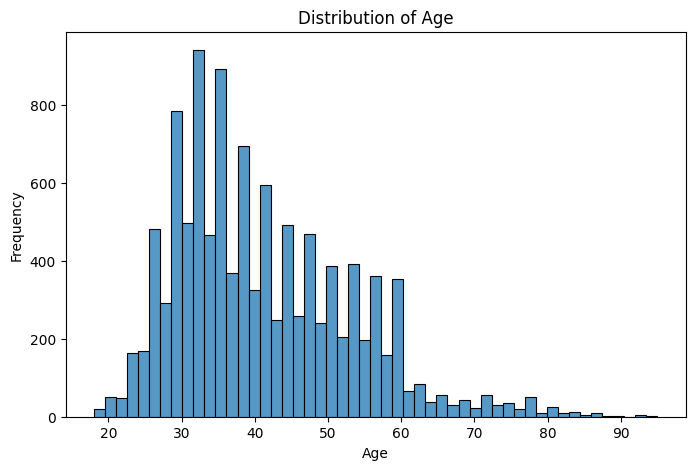

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'])

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution appears slightly right-skewed, with most clients between 30 and 50 years old. Few clients are very young or above 60.

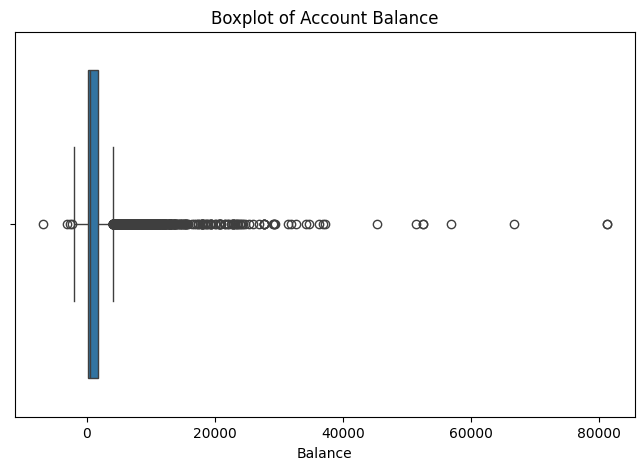

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['balance'])

plt.title("Boxplot of Account Balance")
plt.xlabel("Balance")
plt.show()


The balance variable shows significant outliers, indicating some customers have extremely high account balances. The distribution is highly skewed.The balance distribution is highly right-skewed with several extreme high values, indicating the presence of clients with unusually large account balances. Negative values are also observed, which represent clients who owe money to the bank (overdraft or debt).

In [45]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    
    Lower_Bound = Q1-1.5*IQR
    Upper_Bound = Q3 + 1.5*IQR

    lower_outliers = df[df[col]<Lower_Bound][col].values
    upper_outliers = df[df[col]>Upper_Bound][col].values

    df[col] = df[col].replace(lower_outliers , Lower_Bound , inplace=True)
    df[col] = df[col].replace(upper_outliers , Upper_Bound , inplace= True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19656\1287621254.py:12: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col] = df[col].replace(lower_outliers , Lower_Bound , inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19656\1287621254.py:13: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series 

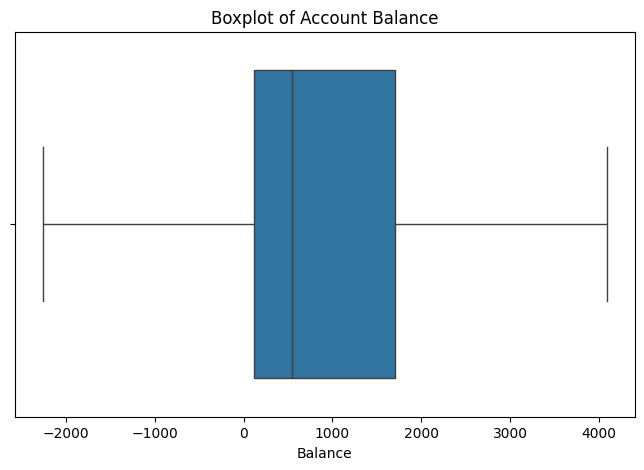

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['balance'])

plt.title("Boxplot of Account Balance")
plt.xlabel("Balance")
plt.show()


After removing outliers:
The distribution becomes more compact and less skewed, with reduced variability, making it more representative of the majority of clients.

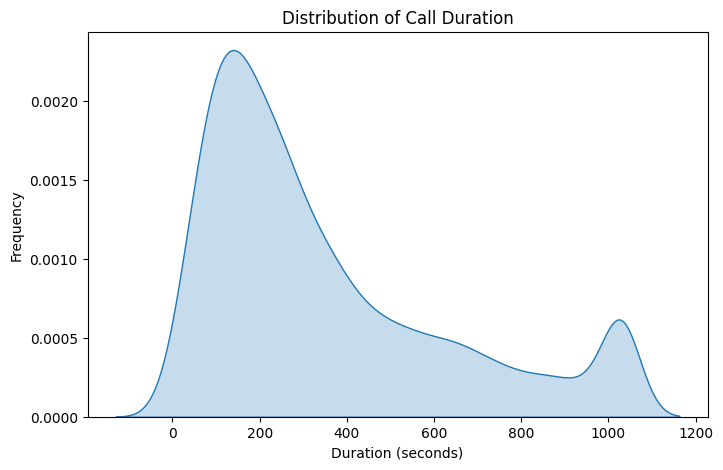

In [ ]:
plt.figure(figsize=(8,5))

sns.kdeplot(df['duration'], fill=True)
plt.title("Distribution of Call Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")

plt.show()


Call duration is heavily right-skewed. Most calls are short, but a few calls last significantly longer.

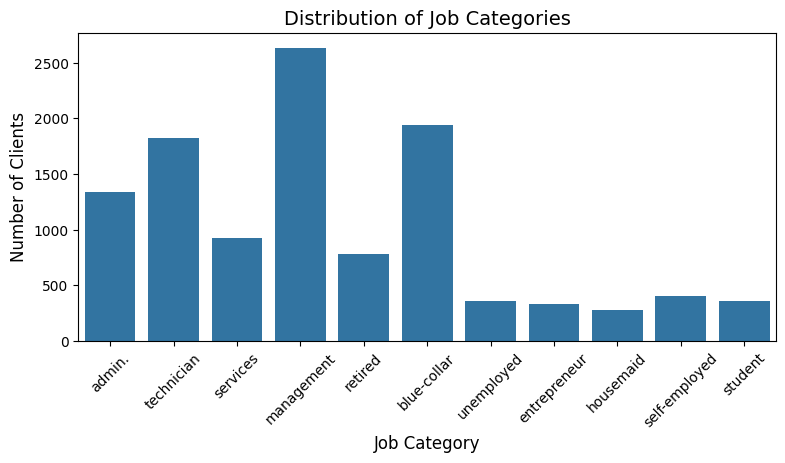

In [63]:
plt.figure(figsize=(9,4))

sns.countplot(x='job', data=df)

plt.title("Distribution of Job Categories", fontsize=14)
plt.xlabel("Job Category", fontsize=12)
plt.ylabel("Number of Clients", fontsize=12)
plt.xticks(rotation=45)


plt.show()


Management, technician, and blue-collar roles constitute the largest client segments in the dataset. In contrast, categories such as unemployed, entrepreneur, housemaid, and student represent relatively smaller proportions, indicating that the campaign primarily engages working professionals across diverse occupational groups.

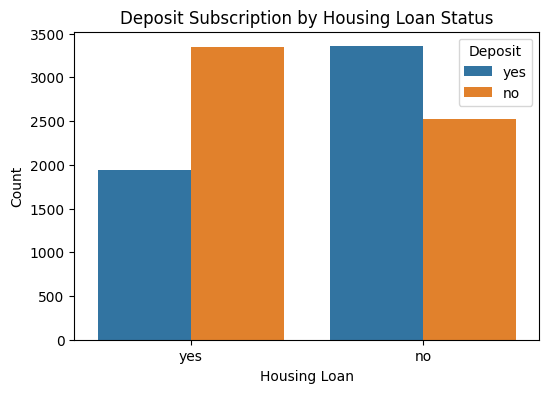

In [66]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='housing', hue='deposit')
plt.title("Deposit Subscription by Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
plt.legend(title="Deposit")

plt.show()


Clients without a housing loan show a higher proportion of term deposit subscriptions compared to those with a housing loan. In contrast, clients with housing loans are more likely not to subscribe, suggesting that existing financial obligations may reduce their likelihood of investing in term deposits.

# Part 6: Final Questions (Short Answers)

# 1. Which preprocessing method was most effective for this dataset?
Imputation (using median for numerical features and mode for categorical features) was the most effective method, as it preserved valuable data while properly handling missing values without significantly reducing the dataset size. The median was preferred over the mean because the dataset contains outliers, and the mean is sensitive to extreme values, which could distort the imputed results.

# 2. Which feature seems most related to deposit subscription? 

In [ ]:
df_corr = df.copy()
df_corr['deposit_encoded'] = df_corr['deposit'].map({'yes': 1, 'no': 0})

In [ ]:
correlation_matrix = df_corr.select_dtypes('number').corr()
correlation_matrix['deposit_encoded'].sort_values()

campaign          -0.134689
day               -0.056326
age                0.031476
balance            0.137582
previous           0.219674
pdays              0.231578
duration           0.491936
deposit_encoded    1.000000
Name: deposit_encoded, dtype: float64

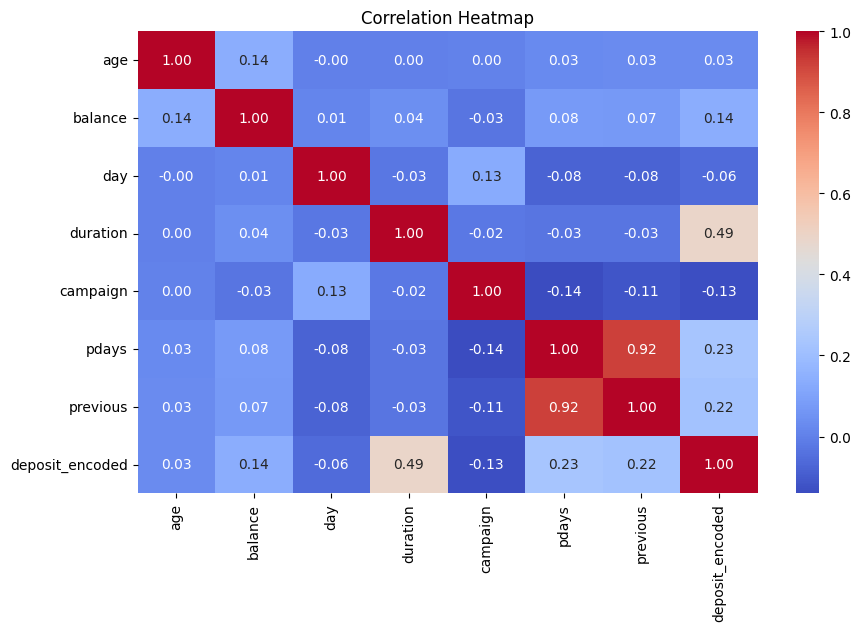

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

2. Which feature seems most related to deposit subscription?

Based on the correlation analysis, call duration shows the strongest relationship with deposit subscription. However, the correlation value is approximately 0.49, which indicates a moderate positive relationship rather than a strong one. This means that longer call durations are associated with a higher likelihood of subscription, but the relationship is not perfectly linear.

It is also important to note that duration may introduce data leakage, since it is only known after the call has ended and cannot be used for real-time prediction.

# 3. What problems could appear if preprocessing is skipped? 

Skipping preprocessing can lead to inaccurate analysis, biased models, poor predictive performance, and errors caused by missing values, outliers, or inconsistent data types.